In [1]:
from estimator import *
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

## Utilities

In [2]:
from scipy.optimize import curve_fit

x = np.tile([f20[0]], [1,11])
x = np.concatenate([x, np.reshape([np.linspace(0.001,.999,11)]*10, [1,-1])], 0)
x = x.transpose()
y = np.reshape(f20[1], [-1])

def fc(x,a,b,c,d):
    return a*x[:,0]**2 + b*x[:,0] + c + d*np.exp(np.abs(.5-x[:,1]))
popt, pcov = curve_fit(fc, x, y)

NameError: name 'f20' is not defined

In [262]:
def plot_func(f, p, m):
    with tf.Graph().as_default():
        x = tf.lin_space(1e-3,1-1e-3,1000)
        z = f(p,x,0.1,1,m)
        with tf.Session() as sess:
            q = sess.run(z)
        return q


def pbgv(f,t=0,b=0,fixed=None):
    n = 1000
    with tf.Graph().as_default():
        u = tf.lin_space(1e-3,1-1e-3,n)
        p = tf.reshape(tf.lin_space(.01,.99,99),[-1,1])
        dd = f(u,p) if fixed is None else f(u,t,b,p,fixed)
        gg = jacobian(tf.transpose(dd),p)        

        with tf.Session() as sess:
            gg,dd = sess.run([gg,dd])
            return dd,gg
        
def pbgv_plot(s, fn, u, *args):
    p = np.linspace(.01,.99,99)
    fig,ax = plt.subplots(2,2,figsize=(16,10))
    ax[0][0].set_ylabel('$|\{\Phi|\Phi>0.5\}| / N$')
    ax[0][1].set_ylabel('$bias(\{\Phi|0.05<\Phi<0.95\})$')
    ax[1][0].set_ylabel('$mean(d\Phi/d\\theta)$')
    ax[1][1].set_ylabel('$variance(d\Phi/d\\theta)$')            

    for f in args:
        f1  = np.mean(f[0]>=.5,1)
        f2  = (1-f[0])*(f[0]>=.5) + f[0]*(f[0]<.5)
        f21 = np.sum(f2*(f2>.05),1)/(np.sum(f2>.05,1)*(np.sum(f2>.05,1)>0) + 1*(np.sum(f2>.05,1)==0))
        f22 = np.mean(f2,1)
        f3  = np.mean(f[1],0)
        f4  = np.std(f[1],0)**2

        ax[0][0].plot(p,f1)
        q = ax[0][1].plot(p,f21)
        ax[0][1].plot(p,f22,c=q[0].get_color(),ls='--')
        ax[1][0].plot(p,f3)
        ax[1][1].plot(p,f4)

    for i in range(2):
        for j in range(2):   
            ax[i][j].set_xlabel('$\\theta$')
            ax[i][j].legend([f[-1] for f in args],loc=(0.01,u[0]))

    if s:
        ax[0][1].set_ylim(u[1])
        ax[1][0].set_ylim(u[2])
        ax[1][1].set_ylim(u[3])
        plt.savefig(fn)
    plt.show()

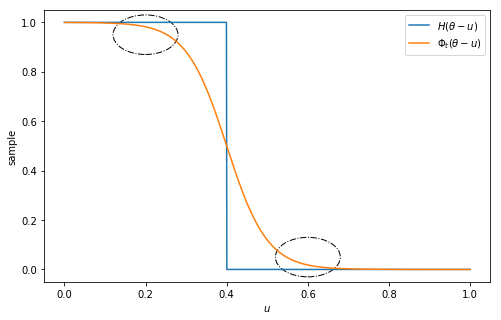

In [264]:
sigmoid = lambda x: 1./(1+np.exp(-x))

x = np.linspace(0,1,1000)
p, t =.4, .05

plt.subplots(figsize=(8,5))
heav = np.heaviside(p-x,1)
appr = sigmoid((p-x)/t)
bias = np.abs(heav-appr)
gradient = appr*(1-appr)/t

lns3 = plt.plot(x,heav)
lns1 = plt.plot(x,appr)

plt.ylabel('sample')
plt.xlabel('$u$')
plt.gcf().gca().add_artist(plt.Circle((.2, .95), 0.08, ls='-.', color='k', fill=False))
plt.gcf().gca().add_artist(plt.Circle((.6, .05), 0.08, ls='-.',color='k', fill=False))

plt.legend(['$H(\\theta-u)$','$\Phi_t(\\theta-u)$','bias','gradient'])
#plt.savefig('31')
plt.show()

In [ ]:
a = plot_func(mse,.5,.5,.2,'p')

x = np.linspace(.001,.999,1000)
plt.subplots(figsize=(8,5))
plt.plot(x,a,linewidth=3)
plt.axvline(x=.5,ymin=0,ymax=0.5,c='orange',lw='1')
plt.axvline(x=.54,ymin=0,ymax=.5,ls='-.',c='orange',lw='1')
plt.axhline(y=.5,ls='--',c='g',lw='1')
plt.axhline(y=-.5,ls='-',c='g',lw='1')
plt.axhline(y=.0,xmin=0,xmax=.54,ls='--',c='0.5',lw='1')


plt.legend(['$\\theta-F^{-1}(u;\\theta)$','$\\theta$','$w$','$\mu_1$','$\mu_0$'],loc=(.77,.6))
plt.xlabel('u')
plt.ylabel('$\\theta-F^{-1}(u;\\theta)$')
#plt.savefig('32')
plt.show()

In [ ]:
a1 = plot_func(mse,.5,.3, 5, .1)
a2 = plot_func(mse,.5,.3, 8,.1)
a3 = plot_func(mse,.5,.3, 2, .1)
a4 = plot_func(mse,.5,.4, 5, .1)
a5 = plot_func(mse,.5,.2, 5, .1)
a6 = plot_func(mse,.5,.3, 5, .05)
a7 = plot_func(mse,.5,.3, 5, .2)

In [ ]:
x = np.linspace(1e-3,1-1e-3,1000)
fig,ax = plt.subplots(1,1,figsize=(8,5))
plt.plot(x,a1)
q = plt.plot(x,a2,ls='--')
plt.plot(x,a3, c=q[0].get_color())
q = plt.plot(x,a4,ls='--')
plt.plot(x,a5, c=q[0].get_color())
q = plt.plot(x,a6,ls='--')
plt.plot(x,a7, c=q[0].get_color())

plt.legend(['$t=0.1,\quad\\beta=5,\quadd=0.3$', '$t=0.1,\quad\\beta=8,\quadd=0.3$', '$t=0.1,\quad\\beta=2,\quadd=0.3$',
            '$t=0.1,\quad\\beta=5,\quadd=0.4$', '$t=0.1,\quad\\beta=5,\quadd=0.2$',
            '$t=0.05,$ $\\beta=5,\quadd=0.3$', '$t=0.2,\quad\\beta=5,\quadd=0.3$'])
plt.xlabel('$u$')
plt.ylabel('$\\sigma((\\theta-F^{-1}(u;\\theta))/t)$')
plt.savefig('33')
plt.show()

In [4]:
a1 = plot_func(mse,.2,0)
a2 = plot_func(mse,.4,0)
a3 = plot_func(mse,.6,0)
a4 = plot_func(mse,.8,0)

b1 = plot_func(mse,.2,1)
b2 = plot_func(mse,.4,1)
b3 = plot_func(mse,.6,1)
b4 = plot_func(mse,.8,1)

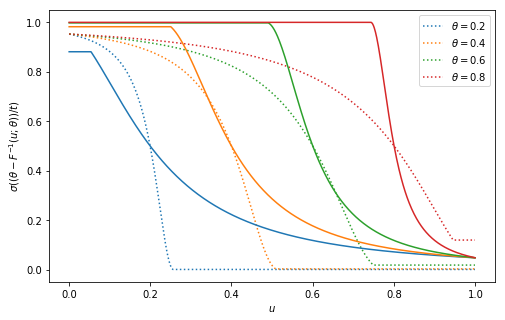

In [14]:
x = np.linspace(1e-3,1-1e-3,1000)
fig,ax = plt.subplots(1,1,figsize=(8,5))
q = plt.plot(x,a1,ls=':')
q2 = plt.plot(x,a2,ls=':')
q3 = plt.plot(x,a3,ls=':')
q4 = plt.plot(x,a4,ls=':')
plt.plot(x,b1,c=q[0].get_color())
plt.plot(x,b2,c=q2[0].get_color())
plt.plot(x,b3,c=q3[0].get_color())
plt.plot(x,b4,c=q4[0].get_color())

plt.legend(['$\\theta=0.2$','$\\theta=0.4$','$\\theta=0.6$','$\\theta=0.8$'])
plt.xlabel('$u$')
plt.ylabel('$\\sigma((\\theta-F^{-1}(u;\\theta))/t)$')
plt.savefig('34')

plt.show()

In [ ]:
k = .1+.3*.2
c1 = plot_func(mse,.2,k,5.,.1)
k = .1+.3*.4
c2 = plot_func(mse,.4,k,5.,.1)
k = .1+.3*.6
c3 = plot_func(mse,.6,k,5.,.1)
k = .1+.3*.8
c4 = plot_func(mse,.8,k,5.,.1)

x = np.linspace(1e-3,1-1e-3,1000)
fig,ax = plt.subplots(1,1,figsize=(8,5))
q = plt.plot(x,a1)
q2 = plt.plot(x,a2)
q3 = plt.plot(x,a3)
q4 = plt.plot(x,a4)
plt.plot(x,c1,c=q[0].get_color(),ls='--')
plt.plot(x,c2,c=q2[0].get_color(),ls='--')
plt.plot(x,c3,c=q3[0].get_color(),ls='--')
plt.plot(x,c4,c=q4[0].get_color(),ls='--')

plt.legend(['$\\theta=0.2$','$\\theta=0.4$','$\\theta=0.6$','$\\theta=0.8$'])
plt.xlabel('$u$')
plt.ylabel('$\\sigma((\\theta-F^{-1}(u;\\theta))/t)$')
plt.savefig('35')

plt.show()

## Simulation

In [ ]:
f_mseuu = pbgv(mse,.3,1.)

In [ ]:
pbgv_plot(True,'41',(.79,(.15,.35),(0.4,1.4),(0,5)),
#          f_sm+tuple(['smooth approximation']),
#          f_gb+tuple(['gumbel-softmax']),
          f_mseuu+tuple(['spike-and-exponential']),
          f_mseuu2+tuple(['two sets of mixture']),
          f_mseuu3+tuple(['annealing the temperature']),
         )

In [ ]:
temperature = .1
a = plot_func(gumbel,.5)
x = np.linspace(.001,.999,1000)
plt.subplots(figsize=(8,5))
for i in range(3):
    plt.plot(x,a[i])
plt.legend(['$\\theta=0.2$','$\\theta=0.5$','$\\theta=0.8$'])
plt.xlabel('u')
plt.ylabel('$G(u,\\theta)$')
plt.savefig('38')
plt.show()

In [ ]:
a = plot_func(transform,.5)
plt.subplots(figsize=(8,5))
for i in range(3):
    plt.plot(x,a[i])
plt.legend(['$\\theta=0.2$','$\\theta=0.5$','$\\theta=0.8$'])
plt.xlabel('u')
plt.ylabel('$F^{-1}_\\theta(u)$')
plt.savefig('39')
plt.show()

# Toy experiment

In [19]:
from estimator import *
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def toy_p(f,t,n, cc=.49, c=0.,d=0.,k=0.):
    with tf.Graph().as_default():
        p = tf.lin_space(.01,.99,100)
        pp= tf.expand_dims(p,1)
        u = tf.tile([tf.lin_space(.001,.999,n)],[100,1])
        
        ff = f(pp,u,t,c,d,k)
        obj = tf.square(ff-cc)
        gg = tf.gradients(tf.reduce_mean(obj,1),p)[0]
        
        s  = tf.ceil(pp-u)
        s1 = tf.reduce_sum(s,1)
        s0 = tf.reduce_sum(1-s, 1)
        
        g1 = tf.gradients(s*obj,p)[0] / s1
        g0 = tf.gradients((1-s)*obj,p)[0] / s0

        with tf.Session() as sess:
            rec = np.asarray(sess.run([p, gg, g1, g0]))
            return rec
        
def plot_toy_p(dd, label, fn=None):
    fig,ax = plt.subplots(1,2,figsize=(16,5))
    p = np.linspace(.01,.99,100)
    for j in range(2):
        for i in range(3):
            if j==0:
                q = ax[j].plot(p,dd[i][j+2])
                ax[j].plot(p,dd[i][j+3], c=q[0].get_color(),ls='-.')
            else:
                ax[j].plot(p,dd[i][j])
                print np.var(dd[i]), np.mean(dd[i]), np.where(np.abs(dd[i])<.002)

        ax[1].legend(label)
        ax[j].set_xlabel('$\\theta$')
    ax[0].set_ylabel('Gradient for $x>0.5$ & $x<0.5$')
    ax[1].set_ylabel('Average gradient')    
    ax[1].axhline(y=.0,ls='-.',c='k', lw=.5)        
    ax[0].set_ylim(-4,4)
    ax[1].set_ylim(-.25,.25)
    if fn is not None:
        plt.savefig(fn)
    plt.show()

In [2]:
toy_mxpb2 = []
toy_mxpb2.append(toy_p(mse,.05,5000,.49,1.,3.,.7))
toy_mxpb2.append(toy_p(mse,.05,5000,.49,1.,3.,.5))
toy_mxpb2.append(toy_p(mse,.05,5000,.49,1.,3.,.3))

2.27521 0.230642 (array([1, 1, 1, 1, 1]), array([21, 22, 77, 78, 90]))
2.20115 0.229859 (array([1, 1, 1, 1, 1]), array([29, 30, 31, 32, 78]))
2.10207 0.230223 (array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), array([50, 51, 52, 53, 54, 55, 75, 76, 77, 78, 84, 85]))


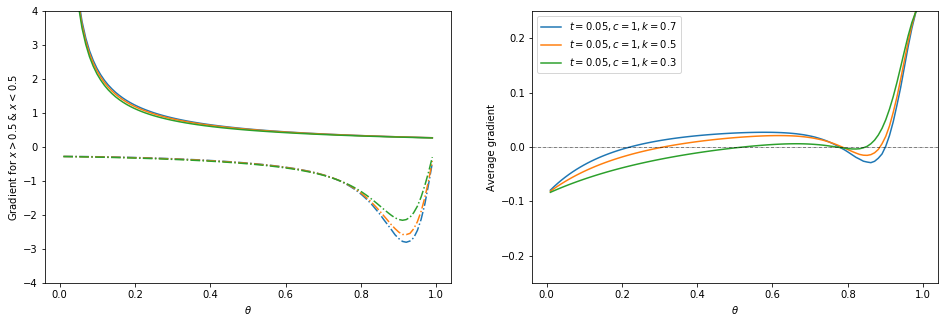

In [3]:
plot_toy_p(toy_mxpb2, ['$t=0.05, c=1, k=0.7$','$t=0.05, c=1, k=0.5$', '$t=0.05, c=1, k=0.3$'])

In [4]:
toy_mxpb = []
toy_mxpb.append(toy_p(mse,.05,5000,.49,1.,3.,1.))
toy_mxpb.append(toy_p(mse,.1,5000,.49,1.,3.,1.))
toy_mxpb.append(toy_p(mse,.2,5000,.49,1.,3.,1.))

2.35693 0.232739 (array([1, 1, 1]), array([14, 15, 76]))
1.16561 0.223969 (array([1, 1]), array([22, 59]))
0.369835 0.184916 (array([1]), array([56]))


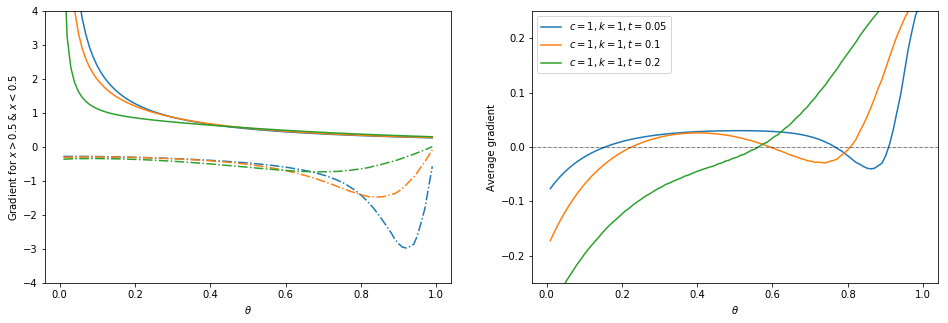

In [5]:
plot_toy_p(toy_mxpb, ['$c=1, k=1, t=0.05$','$c=1, k=1, t=0.1$', '$c=1, k=1, t=0.2$'])

In [23]:
toy_mxp =[]
toy_mxp.append(toy_p(mse,.3,5000,.49,0.,3.,1.))
toy_mxp.append(toy_p(mse,.1,5000,.49,0.,3.,1.))
toy_mxp.append(toy_p(mse,.05,5000,.49,0.,3.,1.))

0.235419 0.144015 (array([], dtype=int64), array([], dtype=int64))
1.84198 0.152313 (array([1, 1]), array([25, 26]))
3.75009 0.155061 (array([1, 1]), array([13, 14]))


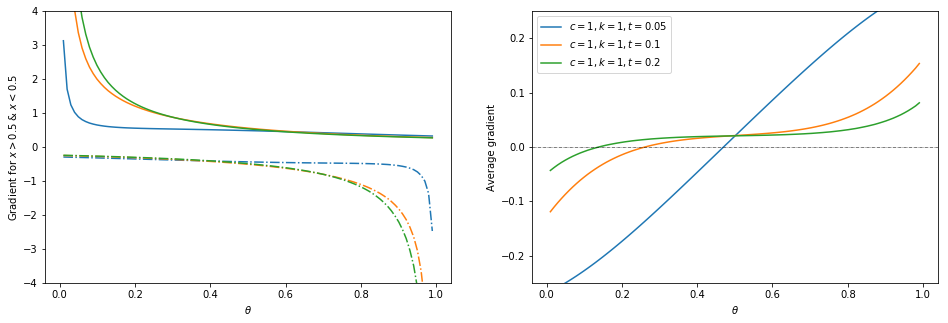

In [24]:
plot_toy_p(toy_mxp, ['$c=1, k=1, t=0.05$','$c=1, k=1, t=0.1$', '$c=1, k=1, t=0.2$'])

In [440]:
toy_gbp =[]
toy_gbp.append(toy_p(gumbel,1.,5000,.49,1.,5.,0.))
toy_gbp.append(toy_p(gumbel,.1,5000,.49,1.,5.,0.))
toy_gbp.append(toy_p(gumbel,.035,5000,.49,1.,5.,0.))

0.504734 (array([1]), array([47]))
4.12209 (array([1]), array([39]))
5.14576 (array([1, 1, 1]), array([20, 21, 22]))


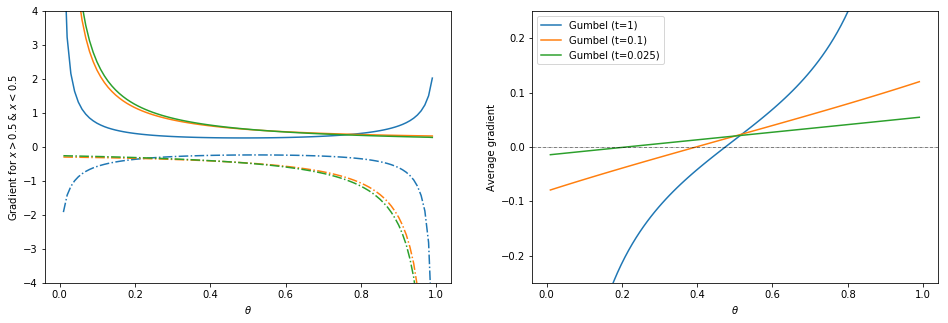

In [441]:
plot_toy_p(toy_gbp, ['Gumbel (t=1)','Gumbel (t=0.1)','Gumbel (t=0.025)'])

In [798]:
toy_stp =[]
toy_stp.append(toy_p(straight_through,.1,5000,.49,1.,5.,0.))
toy_stp.append(toy_p(anneal_straight_through,.5,5000,.49,1.,5.,0.))
toy_stp.append(toy_p(anneal_straight_through,.2,5000,.49,1.,5.,0.))

0.645552 0.140001 (array([], dtype=int64), array([], dtype=int64))
0.948133 0.141336 (array([], dtype=int64), array([], dtype=int64))
2.41246 0.146219 (array([], dtype=int64), array([], dtype=int64))


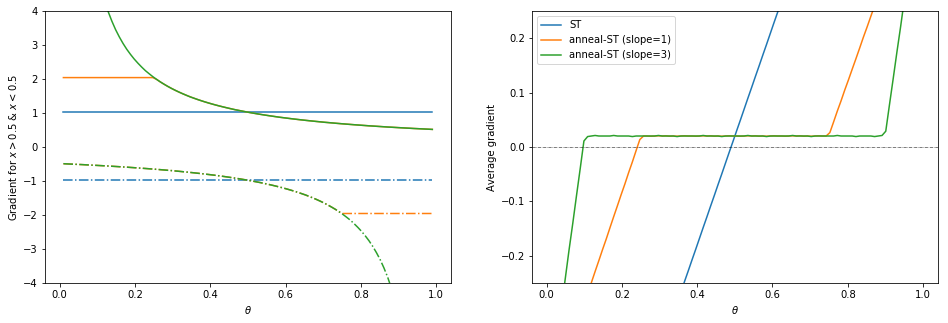

In [799]:
plot_toy_p(toy_stp,['ST','anneal-ST (slope=1)','anneal-ST (slope=3)'])

In [5]:
from estimator import *
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def toy(f,t,n, cc=.49, c=0.,d=5.,k=0.):
    with tf.Graph().as_default():
        p = tf.Variable(tf.constant(.5))
        u = tf.random_uniform([1,n])
        opt = tf.train.GradientDescentOptimizer(.01)
        tt = tf.placeholder(tf.float32)
        ff = f(p,u,tt,c,d,k)
        obj = tf.square(ff-cc)
        train = opt.minimize(tf.reduce_mean(obj))
        
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            rec = []
            for i in range(5000):
                _, sol = sess.run([train, p], {tt:t})
                rec.append(sol)
            return rec

In [ ]:
n = 1000
toy_mx0  = toy(mse,.1,n,.49, 1.,5.,0.)
toy_mx1  = toy(mse,.1,n,.49, 0.,5.,1.)
toy_mx2  = toy(mse,.1,n,.49, 1.,5.,.9)
_toy_mx0 = toy(mse,.1,n,.51, 1.,5.,0.)
_toy_mx1 = toy(mse,.1,n,.51, 0.,5.,1.)
_toy_mx2 = toy(mse,.1,n,.51, 1.,5.,.9)

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(16,5))
ax[0].plot(toy_mx0)
ax[0].plot(toy_mx1)
ax[0].plot(toy_mx2)

ax[1].plot(_toy_mx0)
ax[1].plot(_toy_mx1)
ax[1].plot(_toy_mx2)

ax[0].legend(['mixture (plain)','mixture (two sets)','mixture (d=0.9$\\theta$+0.3)'],
             loc=(.62,.35))
ax[1].legend(['mixture (plain)','mixture (two sets)','mixture (d=0.9$\\theta$+0.3)'],
             loc=(.62,.01))

plt.xlabel('iteration')
plt.ylabel('$\\theta$')
plt.savefig('40')
plt.show()    

In [ ]:
n = 1000
toy_gb = toy(gumbel,.1,n)
toy_gb2= toy(gumbel,.03,n)
toy_st = toy(straight_through,.1,n)
toy_ast= toy(anneal_straight_through,.33,n)
toy_tr = toy(transform,.1,n)
toy_mx = toy(mse,.1,n,.49,1.,5.,.9)

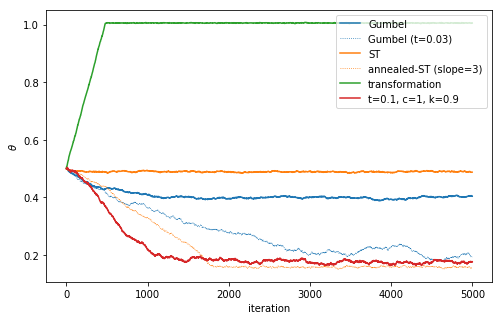

In [17]:
fig,ax = plt.subplots(figsize=(8,5))
q = plt.plot(toy_gb)
plt.plot(toy_gb2, c=q[0].get_color(),ls=':',lw=.8)
q = plt.plot(toy_st)
plt.plot(toy_ast, c=q[0].get_color(),ls=':',lw=.8)
plt.plot(toy_tr)
plt.plot(toy_mx)

plt.legend(['Gumbel','Gumbel (t=0.03)','ST','annealed-ST (slope=3)','transformation','t=0.1, c=1, k=0.9'],
           loc=(.65,.64))

plt.xlabel('iteration')
plt.ylabel('$\\theta$')
plt.savefig('41')
plt.show()    

In [492]:
print np.load('SNN_b/MNIST/GB1e-3/loss_rec.npy')[-2]
print np.load('SNN_b/OMNIGLOT/GB1e-3/loss_rec.npy')[-2]
print np.load('VAE_b/MNIST/GB1e-3/loss_rec.npy')[-2]
print np.load('VAE_b/OMNIGLOT/GB1e-3/loss_rec.npy')[-2]

[ 66.81098938]
[ 73.48435974]
[ 119.72360992]
[ 134.65336609]


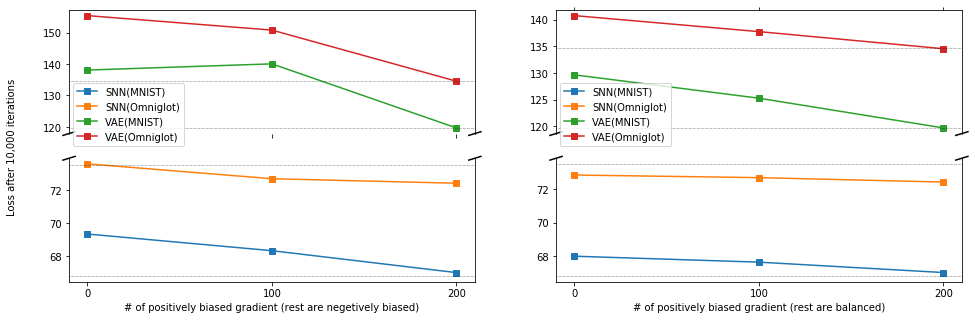

In [510]:
fig, ((ax,ax3),(ax2,ax4)) = plt.subplots(2,2,sharex=True,figsize=(16,5))
x = [0,100,200]

for z in [['/MX1e-3_0_0_200','/MX1e-3_100_0_100','/MX1e-3_200_0_0'],
          ['/MX1e-3_0_200_0','/MX1e-3_100_100_0','/MX1e-3_200_0_0']]:
    for ss in ['SNN','VAE']:
        for s in ['MNIST','OMNIGLOT']:
            if z[0]=='/MX1e-3_0_0_200':
                xx = ax2 if ss=='SNN' else ax
                if ss=='SNN':
                    ax.plot(np.nan,'s-')
            else:
                xx = ax4 if ss=='SNN' else ax3
                if ss=='SNN':
                    ax3.plot(np.nan,'s-')                
            xx.plot(x,
                    [np.load(zz)[-2][0]  for zz in [ss+'_b/'+s+z[0]+'/loss_rec.npy',
                                                    ss+'_b/'+s+z[1]+'/loss_rec.npy',
                                                    ss+'_b/'+s+z[2]+'/loss_rec.npy',
                    ]],'s-')

[xx.axhline(y=66.81098938,ls=':',c='k',lw='.5') for xx in [ax2,ax4]]
[xx.axhline(y=73.48435974,ls=':',c='k',lw='.5') for xx in [ax2,ax4]]
[xx.axhline(y=119.72360992,ls=':',c='k',lw='.5') for xx in [ax,ax3]]
[xx.axhline(y=134.65336609,ls=':',c='k',lw='.5') for xx in [ax,ax3]]



[z.spines['bottom'].set_visible(False) for z in [ax3, ax]]
[z.spines['top'].set_visible(False) for z in [ax4, ax2]]
 
for z in [ax3, ax]:
    z.xaxis.tick_top() 
    z.tick_params(labeltop='off')  # don't put tick labels at the top
    
for z in [ax4, ax]:
    z.xaxis.tick_bottom()

d = .015
for z in [[ax3,ax4],[ax,ax2]]:
    kwargs = dict(transform=z[0].transAxes, color='k', clip_on=False)
    z[0].plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    z[0].plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=z[1].transAxes)  # switch to the bottom axes
    z[1].plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    z[1].plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal


ax4.set_xlabel('# of positively biased gradient (rest are balanced)')
ax2.set_xlabel('# of positively biased gradient (rest are negetively biased)')
ax2.set_ylabel('Loss after 10,000 iterations')
[z.legend(['SNN(MNIST)','SNN(Omniglot)','VAE(MNIST)','VAE(Omniglot)'],loc=(.01,-.1)) for z in [ax3,ax]]

plt.xticks([0,100,200])
#[z.set_ylim(115,160) for z in [ax,ax3]]
#[z.set_ylim(65,75) for z in [ax2,ax4]]

ax2.yaxis.set_label_coords(0.08, 0.5, transform=fig.transFigure)

plt.savefig('55')
plt.show()

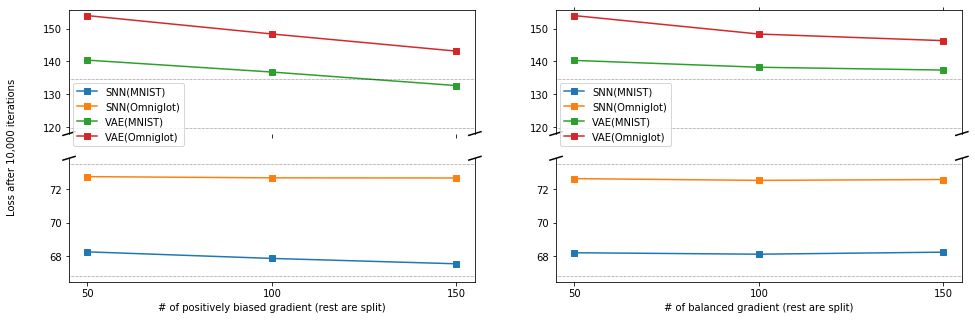

In [511]:
x = [50,100,150]

fig, ((ax,ax3),(ax2,ax4)) = plt.subplots(2,2,sharex=True,figsize=(16,5))

for z in [['/MX1e-3_50_75_75','/MX1e-3_100_50_50','/MX1e-3_150_25_25'],
          ['/MX1e-3_75_50_75','/MX1e-3_50_100_50','/MX1e-3_25_150_25']]:
    for ss in ['SNN','VAE']:
        for s in ['MNIST','OMNIGLOT']:
            if z[0]=='/MX1e-3_50_75_75':
                xx = ax2 if ss=='SNN' else ax
                if ss=='SNN':
                    ax.plot(np.nan,'s-')
            else:
                xx = ax4 if ss=='SNN' else ax3
                if ss=='SNN':
                    ax3.plot(np.nan,'s-')                
            xx.plot(x,
                    [np.load(zz)[-2][0] for zz in [ss+'_b/'+s+z[0]+'/loss_rec.npy',
                                                    ss+'_b/'+s+z[1]+'/loss_rec.npy',
                                                    ss+'_b/'+s+z[2]+'/loss_rec.npy',
                    ]],'s-')

[xx.axhline(y=66.81098938,ls=':',c='k',lw='.5') for xx in [ax2,ax4]]
[xx.axhline(y=73.48435974,ls=':',c='k',lw='.5') for xx in [ax2,ax4]]
[xx.axhline(y=119.72360992,ls=':',c='k',lw='.5') for xx in [ax,ax3]]
[xx.axhline(y=134.65336609,ls=':',c='k',lw='.5') for xx in [ax,ax3]]

[z.spines['bottom'].set_visible(False) for z in [ax3, ax]]
[z.spines['top'].set_visible(False) for z in [ax4, ax2]]
 
for z in [ax3, ax]:
    z.xaxis.tick_top() 
    z.tick_params(labeltop='off')  # don't put tick labels at the top
    
for z in [ax4, ax]:
    z.xaxis.tick_bottom()

d = .015
for z in [[ax3,ax4],[ax,ax2]]:
    kwargs = dict(transform=z[0].transAxes, color='k', clip_on=False)
    z[0].plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    z[0].plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=z[1].transAxes)  # switch to the bottom axes
    z[1].plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    z[1].plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal


ax2.set_xlabel('# of positively biased gradient (rest are split)')
ax4.set_xlabel('# of balanced gradient (rest are split)')
ax2.set_ylabel('Loss after 10,000 iterations')
[z.legend(['SNN(MNIST)','SNN(Omniglot)','VAE(MNIST)','VAE(Omniglot)'],loc=(.01,-.1)) for z in [ax3,ax]]

plt.xticks([50,100,150])
#[z.set_ylim(115,160) for z in [ax,ax3]]
#[z.set_ylim(65,75) for z in [ax2,ax4]]

ax2.yaxis.set_label_coords(0.08, 0.5, transform=fig.transFigure)

plt.savefig('56')
plt.show()

##  Data

In [184]:
def plot_data(errs, label, ax=None):
    ax = ax or plt
    n,d = 100,20
    if len(errs)>300:
        err = np.concatenate([[errs[z] for z in np.arange(0,300,10)],errs[300:]],0)
    else:
        err = errs
    m = np.mean(np.reshape(err, [-1,d]),1)
    line = ax.plot(np.arange(1,n+1,d), m, 's-',label=label)

def plot_legend(ax, *a, **kw):
    leg = ax.legend(*a, **kw)
    return leg

def plot_figure(ylb,yy,dd,v,fn=None):
    fig, ax = plt.subplots(1,2, figsize=(16,5))
    
    for d in dd:
        for i in range(2):
            plot_data(d[0][v[i]],d[1],ax[i])
    plot_legend(ax[0])
    plot_legend(ax[1])

    for i in range(2):
        ax[i].set_xlabel('iteration (1e3)')
        ax[i].set_ylabel(ylb[i])
        if yy[0]!=0:
            ax[0].set_ylim(yy[0],yy[1])

    if fn is not None:
        plt.savefig(fn)
    plt.show()

In [522]:
gb1 = np.load('SNN/MNIST/GB1e-3/loss_rec.npy')
st1 = np.load('SNN/MNIST/ST3e-4_/loss_rec.npy')
ast1 = np.load('SNN/MNIST/AST1e-3/loss_rec.npy')
mx1 = np.load('SNN/MNIST/MX1e-3_3.0/loss_rec.npy')

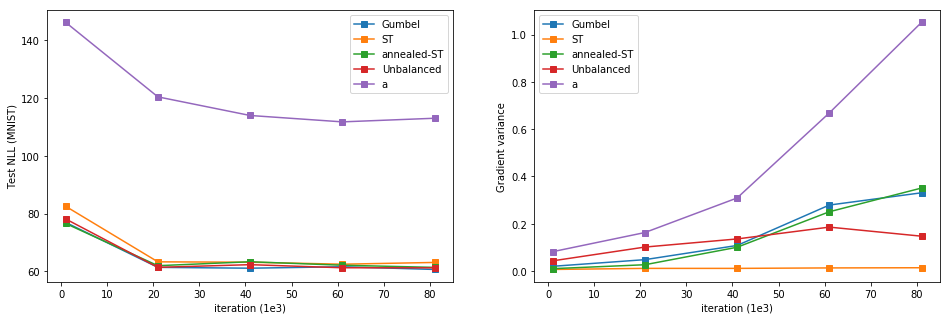

In [546]:
plot_figure(['Test NLL (MNIST)','Gradient variance'],[0,85],
            [[gb1,'Gumbel',0],
             [st1,'ST',0],
             [ast1, 'annealed-ST',0],
             [mx1, 'Unbalanced', 0]
            ],[2,3],
#            '51'
            )

In [520]:
gb2 = np.load('SNN/OMNIGLOT/GB1e-3_/loss_rec.npy')
st2 = np.load('SNN/OMNIGLOT/ST3e-4/loss_rec.npy')
ast2 = np.load('SNN/OMNIGLOT/AST1e-3/loss_rec.npy')
mx2 = np.load('SNN/OMNIGLOT/MX1e-3_3.0/loss_rec.npy')

In [544]:
aa = np.load('AST1e-3/loss_rec.npy')

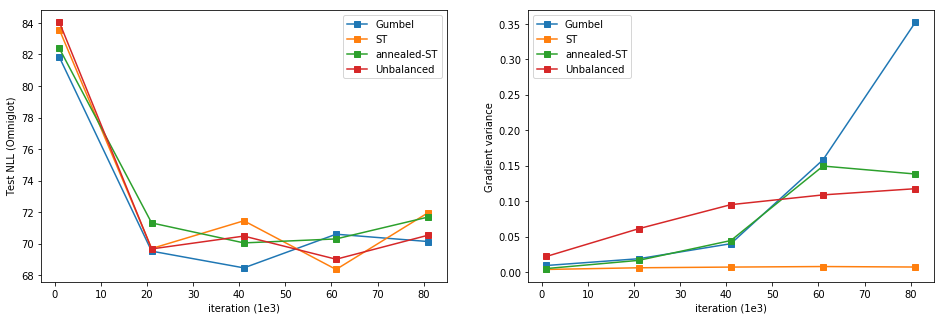

In [547]:
plot_figure(['Test NLL (Omniglot)','Gradient variance'],[0,100],
            [[gb2,'Gumbel',0],
             [st2,'ST',0],
             [ast2, 'annealed-ST',0],
             [mx2, 'Unbalanced', 0]
            ],[2,3],
#            '52'
            )

In [518]:
vgb = np.load('VAE/MNIST/GB1e-3/loss_rec.npy')
vst = np.load('VAE/MNIST/ST1e-3/loss_rec.npy')
vast = np.load('VAE/MNIST/AST1e-3/loss_rec.npy')
vmx = np.load('VAE/MNIST/MX1e-3_7.0/loss_rec.npy')

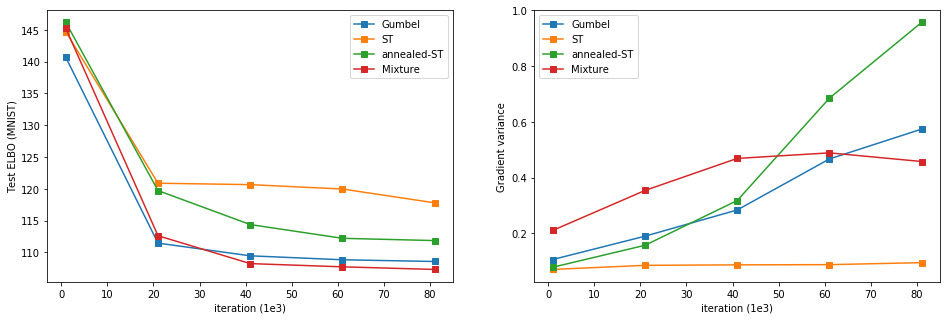

In [549]:
plot_figure(['Test ELBO (MNIST)','Gradient variance'],[0,140],
            [[vgb,'Gumbel',0],
             [vst,'ST',0],
             [vast, 'annealed-ST',0],
             [vmx, 'Mixture', 0]
            ],[2,3],
#            '53'
            )

In [512]:
vgb2 = np.load('VAE/OMNIGLOT/GB1e-3/loss_rec.npy')
vst2 = np.load('VAE/OMNIGLOT/ST3e-4/loss_rec.npy')
vast2 = np.load('VAE/OMNIGLOT/AST3e-4/loss_rec.npy')
vmx2 = np.load('VAE/OMNIGLOT/MX1e-3_3.0/loss_rec.npy')

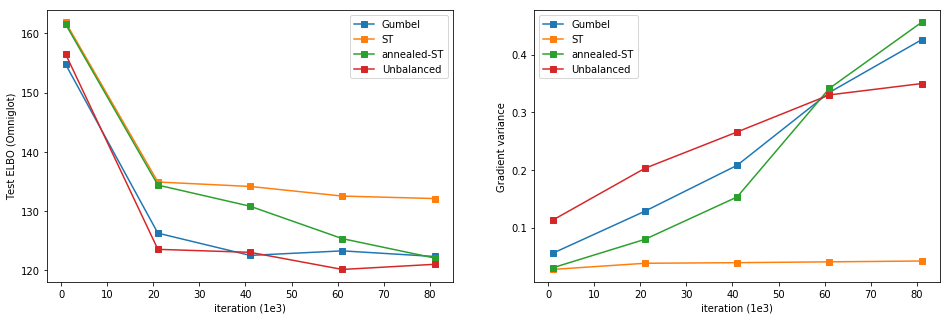

In [543]:
plot_figure(['Test ELBO (Omniglot)','Gradient variance'],[0,160],
            [[vgb2,'Gumbel',0],
             [vst2,'ST',0],
             [vast2, 'annealed-ST',0],
             [vmx2, 'Unbalanced',0]
            ],[2,3],
#            '54'
            )